In [39]:
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [2]:
import keras
import pandas as pd
import numpy as np
import random
import math
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Dropout, Input, Activation, Flatten, LeakyReLU, Add, GaussianNoise
from keras.layers import LSTM, Embedding, Conv1D, GlobalAveragePooling1D, ZeroPadding1D, MaxPooling1D, GRU, UpSampling1D
from keras.layers import Conv2D, GlobalAveragePooling2D, ZeroPadding2D, MaxPooling2D, UpSampling2D
from keras.layers.merge import concatenate
from keras.models import Model, Sequential, load_model, model_from_json
from keras.layers.normalization import BatchNormalization
from keras.backend import clear_session
from keras import regularizers
from keras.utils import plot_model
from IPython.display import Image
from keras import backend as K
import tensorflow as tf

import csv
import os
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz2.38\\bin'

In [3]:
Distance = 'cosine'
Train = pd.read_csv(f'.\data\Train_v5_{Distance}_with_handcrafted_features1_8.csv', index_col = 0)
Label = Train['Loan_Status']
Train = Train.drop('Loan_Status',axis = 1)
Test = pd.read_csv(f'.\data\Test_v5_{Distance}_with_handcrafted_features1_8.csv', index_col = 0)

In [4]:
print(Train.shape)
Train.describe(include = 'all')

(614, 24)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,...,Property_Area_Semiurban,Property_Area_Urban,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.187296,0.649837,0.781759,0.135179,0.066709,0.038910,0.210161,0.712541,0.838762,0.576547,...,0.379479,0.328990,0.233474,0.268284,0.074998,0.772063,0.227937,0.097815,0.031164,0.051280
std,0.390467,0.477410,0.413389,0.342194,0.075420,0.070229,0.123294,0.135514,0.368050,0.494509,...,0.485653,0.470229,0.081756,0.141921,0.055046,0.237441,0.237441,0.084586,0.056816,0.056457
min,0.000000,0.000000,0.000000,0.000000,0.001852,0.000000,0.012857,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.024669,0.006424,0.002703,0.009885,0.000000,0.002778,0.000000,-0.022869
25%,0.000000,0.000000,1.000000,0.000000,0.035525,0.000000,0.142857,0.750000,1.000000,0.000000,...,0.000000,0.000000,0.190076,0.170275,0.048649,0.574150,0.000000,0.058607,0.000000,0.024255
50%,0.000000,1.000000,1.000000,0.000000,0.047068,0.028524,0.182857,0.750000,1.000000,1.000000,...,0.000000,0.000000,0.236027,0.253516,0.068702,0.798036,0.201964,0.081002,0.023507,0.044823
75%,0.000000,1.000000,1.000000,0.000000,0.071543,0.055134,0.242143,0.750000,1.000000,1.000000,...,1.000000,1.000000,0.276057,0.335329,0.087379,1.000000,0.425850,0.105903,0.047346,0.063978
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.808736,1.000000,1.000000,1.000000,0.990115,0.828875,1.000000,1.000000


In [5]:
print(Test.shape)
Test.describe(include = 'all')

(367, 24)


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,...,Property_Area_Semiurban,Property_Area_Urban,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.196185,0.634877,0.771117,0.103542,0.059328,0.037670,0.195232,0.712511,0.833787,0.561308,...,0.316076,0.381471,0.238748,0.273298,0.073583,0.763742,0.236258,0.092871,0.032577,0.049828
std,0.397652,0.482122,0.420687,0.305082,0.060626,0.056021,0.088366,0.138158,0.372780,0.496905,...,0.465578,0.486411,0.091139,0.129595,0.034669,0.242520,0.242520,0.074385,0.050850,0.035558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.012500,0.000000,0.000000,...,0.000000,0.000000,0.018624,0.004414,0.001154,0.000000,0.000000,0.000000,0.000000,-0.024458
25%,0.000000,0.000000,1.000000,0.000000,0.035358,0.000000,0.143571,0.750000,1.000000,0.000000,...,0.000000,0.000000,0.190907,0.190703,0.051136,0.552370,0.000000,0.057193,0.000000,0.026807
50%,0.000000,1.000000,1.000000,0.000000,0.046741,0.024600,0.178571,0.750000,1.000000,1.000000,...,0.000000,0.000000,0.237313,0.262612,0.068966,0.796425,0.203575,0.080469,0.019730,0.045093
75%,0.000000,1.000000,1.000000,0.000000,0.062469,0.058332,0.225714,0.750000,1.000000,1.000000,...,1.000000,1.000000,0.280793,0.339534,0.086126,1.000000,0.447630,0.104162,0.047535,0.062694
max,1.000000,1.000000,1.000000,1.000000,0.895420,0.575995,0.785714,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.849985,0.257143,1.000000,1.000000,1.000000,0.431321,0.238095


In [6]:
Data = pd.concat([Train, Test])
Data.describe(include = 'all')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,...,Property_Area_Semiurban,Property_Area_Urban,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,0.190622,0.644241,0.777778,0.123344,0.063948,0.038446,0.204576,0.712530,0.836901,0.570846,...,0.355759,0.348624,0.235447,0.270159,0.074469,0.768950,0.231050,0.095965,0.031692,0.050737
std,0.392992,0.478987,0.415952,0.328999,0.070310,0.065250,0.111701,0.136439,0.369644,0.495208,...,0.478987,0.476778,0.085379,0.137394,0.048422,0.239264,0.239264,0.080917,0.054638,0.049663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012857,0.012500,0.000000,0.000000,...,0.000000,0.000000,0.018624,0.004414,0.001154,0.000000,0.000000,0.000000,0.000000,-0.024458
25%,0.000000,0.000000,1.000000,0.000000,0.035494,0.000000,0.142857,0.750000,1.000000,0.000000,...,0.000000,0.000000,0.190824,0.175106,0.050000,0.568522,0.000000,0.057944,0.000000,0.025641
50%,0.000000,1.000000,1.000000,0.000000,0.046914,0.026640,0.181429,0.750000,1.000000,1.000000,...,0.000000,0.000000,0.237154,0.258099,0.068702,0.796607,0.203393,0.080825,0.022206,0.044823
75%,0.000000,1.000000,1.000000,0.000000,0.068099,0.056760,0.231429,0.750000,1.000000,1.000000,...,1.000000,1.000000,0.277644,0.336837,0.086538,1.000000,0.431478,0.105000,0.047413,0.063116
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# PCA

In [185]:
Data = pd.concat([Train, Test])
pca = PCA(n_components=0.9)
pca.fit(Data)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [186]:
Train = pca.transform(Train.values)
Test = pca.transform(Test.values)

In [187]:
Train.shape

(614, 3)

# XGBoost

In [188]:
print(test_index.shape)
print(train_index.shape)

(122,)
(492,)


# From feature important
Hand-crafted features perform much information  
ApplicantIncome, LoanAmount, Credit_History and CoapplicantIncome

In [162]:
important_features = ['ApplicantIncome', 'LoanAmount', 'Credit_History', 'CoapplicantIncome'] + ['feature' + str(i) for i in range(8)]

In [163]:
Train = Train[important_features]
Test = Test[important_features]

In [181]:
num_tree = 64
max_depth = 2
col_sample_by_tree = 0.4
threshold = 0.4
Alpha = 10
LR = 0.1

Performance = []
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in skf.split(Train, Label):
    
    xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = col_sample_by_tree, learning_rate = LR,\
                              max_depth = max_depth, alpha = Alpha, n_estimators = num_tree)
    
    xg_reg.fit(Train.iloc[train_index],Label.iloc[train_index])
    OUT = xg_reg.predict(Train.iloc[test_index])
    Sum = 0
    for ind, ind_label in enumerate(test_index):
        if OUT[ind]>threshold and Label.iloc[ind_label] == 1:
            Sum = Sum + 1
        elif OUT[ind]<threshold and Label.iloc[ind_label] == 0:
            Sum = Sum + 1
    Performance.append(Sum/Label.iloc[test_index].shape[0])
print(Performance)
print(np.mean(Performance))

C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.782258064516129, 0.8387096774193549, 0.8360655737704918, 0.7622950819672131, 0.7950819672131147]
0.8028820729772608


# XGBoost with PCA

In [192]:
num_tree = 64
max_depth = 4
col_sample_by_tree = 0.4
threshold = 0.4
Alpha = 10
LR = 0.1

Performance = []
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
for train_index, test_index in skf.split(Train, Label):
    
    xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = col_sample_by_tree, learning_rate = LR,\
                              max_depth = max_depth, alpha = Alpha, n_estimators = num_tree)
    
    xg_reg.fit(Train[train_index,:],Label.iloc[train_index])
    OUT = xg_reg.predict(Train[test_index,:])
    Sum = 0
    for ind, ind_label in enumerate(test_index):
        if OUT[ind]>threshold and Label.iloc[ind_label] == 1:
            Sum = Sum + 1
        elif OUT[ind]<threshold and Label.iloc[ind_label] == 0:
            Sum = Sum + 1
    Performance.append(Sum/Label.iloc[test_index].shape[0])
print(Performance)
print(np.mean(Performance))

[0.782258064516129, 0.7741935483870968, 0.8032786885245902, 0.8114754098360656, 0.8032786885245902]
0.7948968799576944


C:\Users\Admin\Anaconda3\envs\tf-gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [34]:
threshold = 0.5
OUT2 = []
for i in range(len(OUT)):
    if OUT[i] > threshold:
        OUT2.append('1')
    else:
        OUT2.append('0')
print(OUT2)

['1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1',

In [35]:
ANS = pd.DataFrame({'Loan_ID':Test.index, 'Loan_Status':OUT2}).replace({'1':'Y', '0':'N'})

In [36]:
ANS.to_csv('.\data\XG_cos_th_'+str(threshold)+'_NT_'+str(num_tree) +'_max_depth_' + str(max_depth)+ \
           '_sample_cols_' + str(col_sample_by_tree) +'_V6.csv',index = 0)

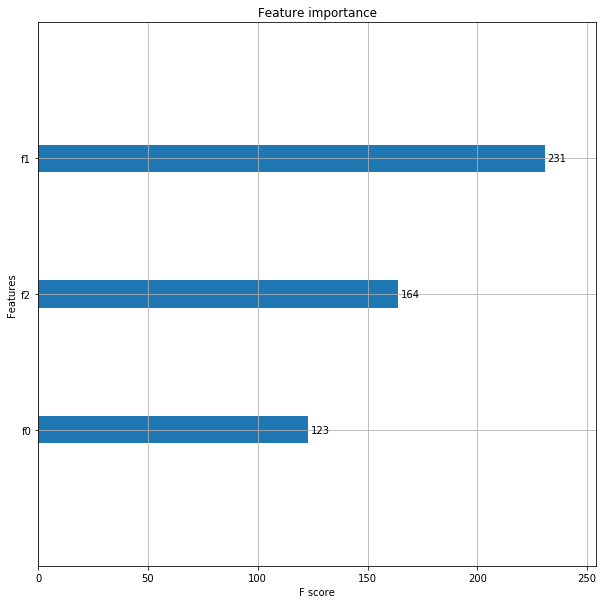

In [193]:
xgb.plot_importance(xg_reg)
#plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

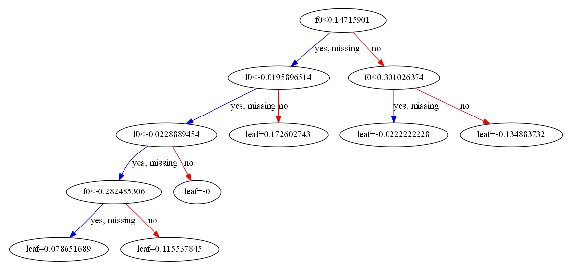

In [194]:
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [120, 150]
plt.show()

# SVM

In [9]:
Gamma = 0.1
C = 1
clf = SVC(gamma= Gamma, C= C, class_weight='balanced')
clf.fit(Train.values, Label.values) 
OUT = clf.predict(Test.values)
print(OUT)
print(len(OUT))
OUT = [str(i) for i in OUT]

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
367


In [10]:
ANS = pd.DataFrame({'Loan_ID':Test.index, 'Loan_Status':OUT}).replace({'1':'Y', '0':'N'})

In [11]:
ANS.to_csv(f'.\data\SVM_{Distance}_C_'+str(C)+'_Gamma_'+str(Gamma)+'_V5.csv',index = 0)

In [47]:
ANS

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,N
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# MLP

In [126]:
L = 5
hidden = 1
clf = MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(L,hidden),max_iter=1000, random_state=1,learning_rate = 'adaptive')
clf.fit(Train.values, Label.values) 
OUT = clf.predict(Test.values)
print(OUT)
print(len(OUT))
OUT = [str(i) for i in OUT]

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
367


In [127]:
ANS = pd.DataFrame({'Loan_ID':Test.index, 'Loan_Status':OUT}).replace({'1':'Y', '0':'N'})

In [128]:
ANS.to_csv('.\data\MLP_L_'+str(L)+ '_hidden_'+ str(hidden) +'_V2.csv',index = 0)

# using Keras

In [6]:
#compute imbalancing
SUM_1 = np.sum(Label)
class_weights = [SUM_1/Label.shape[0], (Label.shape[0]-SUM_1)/Label.shape[0]]
print(class_weights)

[0.6872964169381107, 0.3127035830618892]


In [31]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(Label.values),Label.values)
print(class_weights)

[1.59895833 0.72748815]


In [33]:
input_size = 4
output_size = 1
L2 = 0
L_rate = 0.01
OUT = []
# for i in range(10):
INPUT =Input(shape = (Train.shape[1],))
x = Dense(input_size, kernel_regularizer = regularizers.l2( L2))(INPUT)
x = Activation('relu')(x)
x = Dense(input_size, kernel_regularizer = regularizers.l2( L2))(x)
x = Activation('relu')(x)
x = Dense(input_size, kernel_regularizer = regularizers.l2( L2))(x)
x = Activation('relu')(x)
x = Dense(output_size, kernel_regularizer = regularizers.l2( L2))(x)
out = Activation('sigmoid')(x)

model = Model(inputs=INPUT, outputs=out)
model.summary()
MY_LR = keras.callbacks.ReduceLROnPlateau(monitor='acc', factor=0.5, patience=40, mode='auto', min_delta=0.0001)
MY_ES = keras.callbacks.EarlyStopping(monitor='val_acc', min_delta=0, patience=100,\
                                      verbose=2, mode='auto', restore_best_weights=True)
adam=Adam(lr=L_rate, epsilon=1e-8, decay=0)
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
model.fit(Train, Label.values, batch_size=256, epochs=1000, verbose=2,\
          class_weight = class_weights,validation_split = 0.2, callbacks = [MY_LR,MY_ES])
OUT = model.predict(Test)

print(OUT)
# print(len(OUT))
#OUT = [str(i) for i in OUT]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 36        
_________________________________________________________________
activation_17 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_18 (Activation)   (None, 4)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 20        
_________________________________________________________________
activation_19 (Activation)   (None, 4)                 0         
__________

Epoch 79/1000
 - 0s - loss: 0.4520 - acc: 0.8086 - val_loss: 0.5637 - val_acc: 0.7805
Epoch 80/1000
 - 0s - loss: 0.4513 - acc: 0.8086 - val_loss: 0.5652 - val_acc: 0.7805
Epoch 81/1000
 - 0s - loss: 0.4507 - acc: 0.8086 - val_loss: 0.5660 - val_acc: 0.7805
Epoch 82/1000
 - 0s - loss: 0.4508 - acc: 0.8065 - val_loss: 0.5666 - val_acc: 0.7805
Epoch 83/1000
 - 0s - loss: 0.4497 - acc: 0.8065 - val_loss: 0.5696 - val_acc: 0.7805
Epoch 84/1000
 - 0s - loss: 0.4488 - acc: 0.8065 - val_loss: 0.5718 - val_acc: 0.7805
Epoch 85/1000
 - 0s - loss: 0.4485 - acc: 0.8086 - val_loss: 0.5731 - val_acc: 0.7805
Epoch 86/1000
 - 0s - loss: 0.4480 - acc: 0.8106 - val_loss: 0.5733 - val_acc: 0.7805
Epoch 87/1000
 - 0s - loss: 0.4473 - acc: 0.8106 - val_loss: 0.5720 - val_acc: 0.7805
Epoch 88/1000
 - 0s - loss: 0.4467 - acc: 0.8106 - val_loss: 0.5722 - val_acc: 0.7805
Epoch 89/1000
 - 0s - loss: 0.4461 - acc: 0.8106 - val_loss: 0.5723 - val_acc: 0.7805
Epoch 90/1000
 - 0s - loss: 0.4458 - acc: 0.8106 - val

In [17]:
keras.backend.clear_session()

In [34]:
threshold = 0.55
OUT2 = []
for i in range(len(OUT)):
    if OUT[i][0] > threshold:
        OUT2.append('1')
    else:
        OUT2.append('0')
print(OUT2)

['1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1',

In [35]:
ANS = pd.DataFrame({'Loan_ID':Test.index, 'Loan_Status':OUT2}).replace({'1':'Y', '0':'N'})

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [36]:
ANS.to_csv('.\data\MLP_cos_keras_th_'+str(threshold)+'_L_'+str(input_size)+ '_L2_'+ str(L2) +'_V5.csv',index = 0)

NameError: name 'ANS' is not defined

In [32]:
Train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,...,Property_Area_Semiurban,Property_Area_Urban,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
Loan_ID,,,,,,,,,,,,,,,,,,,,,
LP001002,0.0,0.0,1.0,0.0,0.072210,0.000000,0.165714,0.750,1.0,1.0,...,0.0,1.0,0.193917,0.246538,0.077586,1.000000,0.000000,0.126056,0.000000,0.053935
LP001003,0.0,1.0,1.0,0.0,0.056580,0.036192,0.182857,0.750,1.0,0.0,...,0.0,0.0,0.205476,0.236743,0.070312,0.752422,0.247578,0.089512,0.031336,0.046474
LP001005,0.0,1.0,1.0,1.0,0.037037,0.000000,0.094286,0.750,1.0,1.0,...,0.0,1.0,0.215111,0.480667,0.136364,1.000000,0.000000,0.113636,0.000000,0.114219
LP001006,0.0,1.0,0.0,0.0,0.031889,0.056592,0.171429,0.750,1.0,1.0,...,0.0,1.0,0.237469,0.291844,0.075000,0.522769,0.477231,0.053812,0.052265,0.051282
LP001008,0.0,0.0,1.0,0.0,0.074074,0.000000,0.201429,0.750,1.0,1.0,...,0.0,1.0,0.229778,0.240333,0.063830,1.000000,0.000000,0.106383,0.000000,0.039825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002978,1.0,0.0,1.0,0.0,0.035802,0.000000,0.101429,0.750,1.0,1.0,...,0.0,0.0,0.239387,0.497241,0.126761,1.000000,0.000000,0.102113,0.000000,0.104370
LP002979,0.0,1.0,1.0,0.0,0.050691,0.000000,0.057143,0.375,1.0,0.0,...,0.0,0.0,0.095254,0.175597,0.112500,1.000000,0.000000,0.256625,0.000000,0.089744
LP002983,0.0,1.0,1.0,0.0,0.099654,0.005760,0.361429,0.750,1.0,0.0,...,0.0,1.0,0.297615,0.173484,0.035573,0.971126,0.028874,0.079763,0.002523,0.010844
